#Introduction
Remaining useful life (RUL) is the amount of time a machine or an asset is likely to operate before it requires repair or replacement. Depending on your system, this time period can be represented in number of Days, Miles, Cycles or any other quantity. RUL prediction provides early warnings of failure and has become a key component in the prognostics and health management of systems. It allows engineers to schedule maintenance, optimize operating efficiency and avoid unplanned downtime.

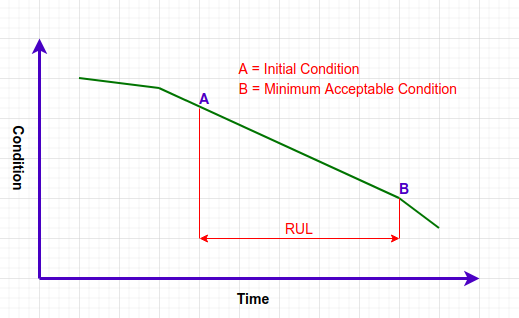

This image shows the deterioration of a machine over time. If A is the current condition and B is the minimum acceptable condition beyond which the machine will fail, Remaining Useful Life is computed as the time between these two points. If RUL is estimated in advance, maintenance or replacement can be carried out to avoid unplanned downtime and economic losses. Since the prediction of RUL is critical to operations and decision making, it is important to estimate it accurately.

reference: 'Remaining Useful Life (RUL) Prediction'( https://www.stratada.com/remaining-useful-life-rul-prediction/ )

#IMPORTING LIBRARIES

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

#LOADING THE DATA SET

In [46]:
df = pd.read_csv("/content/Battery_RUL.csv")

In [54]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  int64  
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.0 MB


In [8]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [48]:
df.isnull().sum()          ## Checking missing values

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

#Exploratory data analysis (EDA)

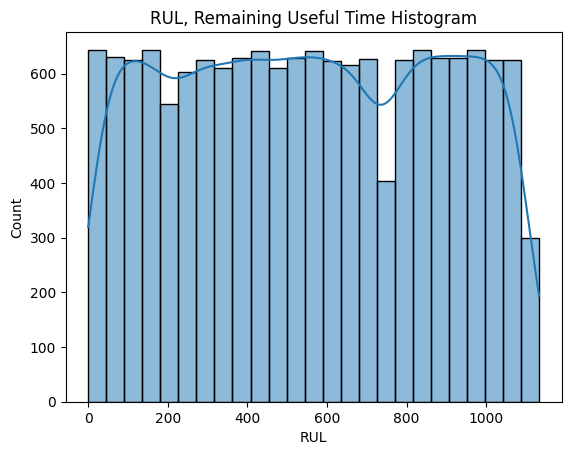

In [9]:
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(df.RUL, kde=True)
plt.show()

In [10]:
corrmat = df.corr()
corrmat

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


#Heatmap showing correlation

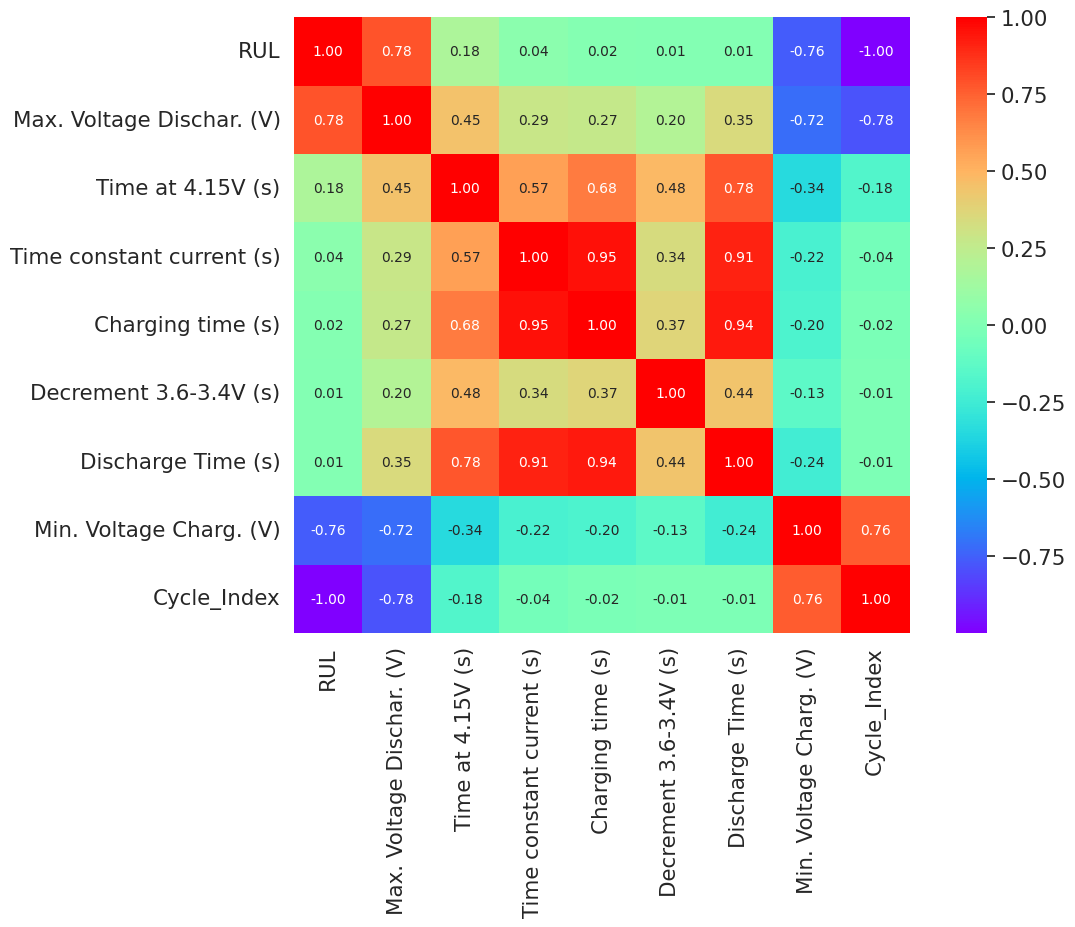

In [11]:
plt.figure(figsize=(12, 8))
k=9
cols = corrmat.nlargest(k, 'RUL')['RUL'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values,cmap="rainbow")
plt.show()

In [12]:

df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

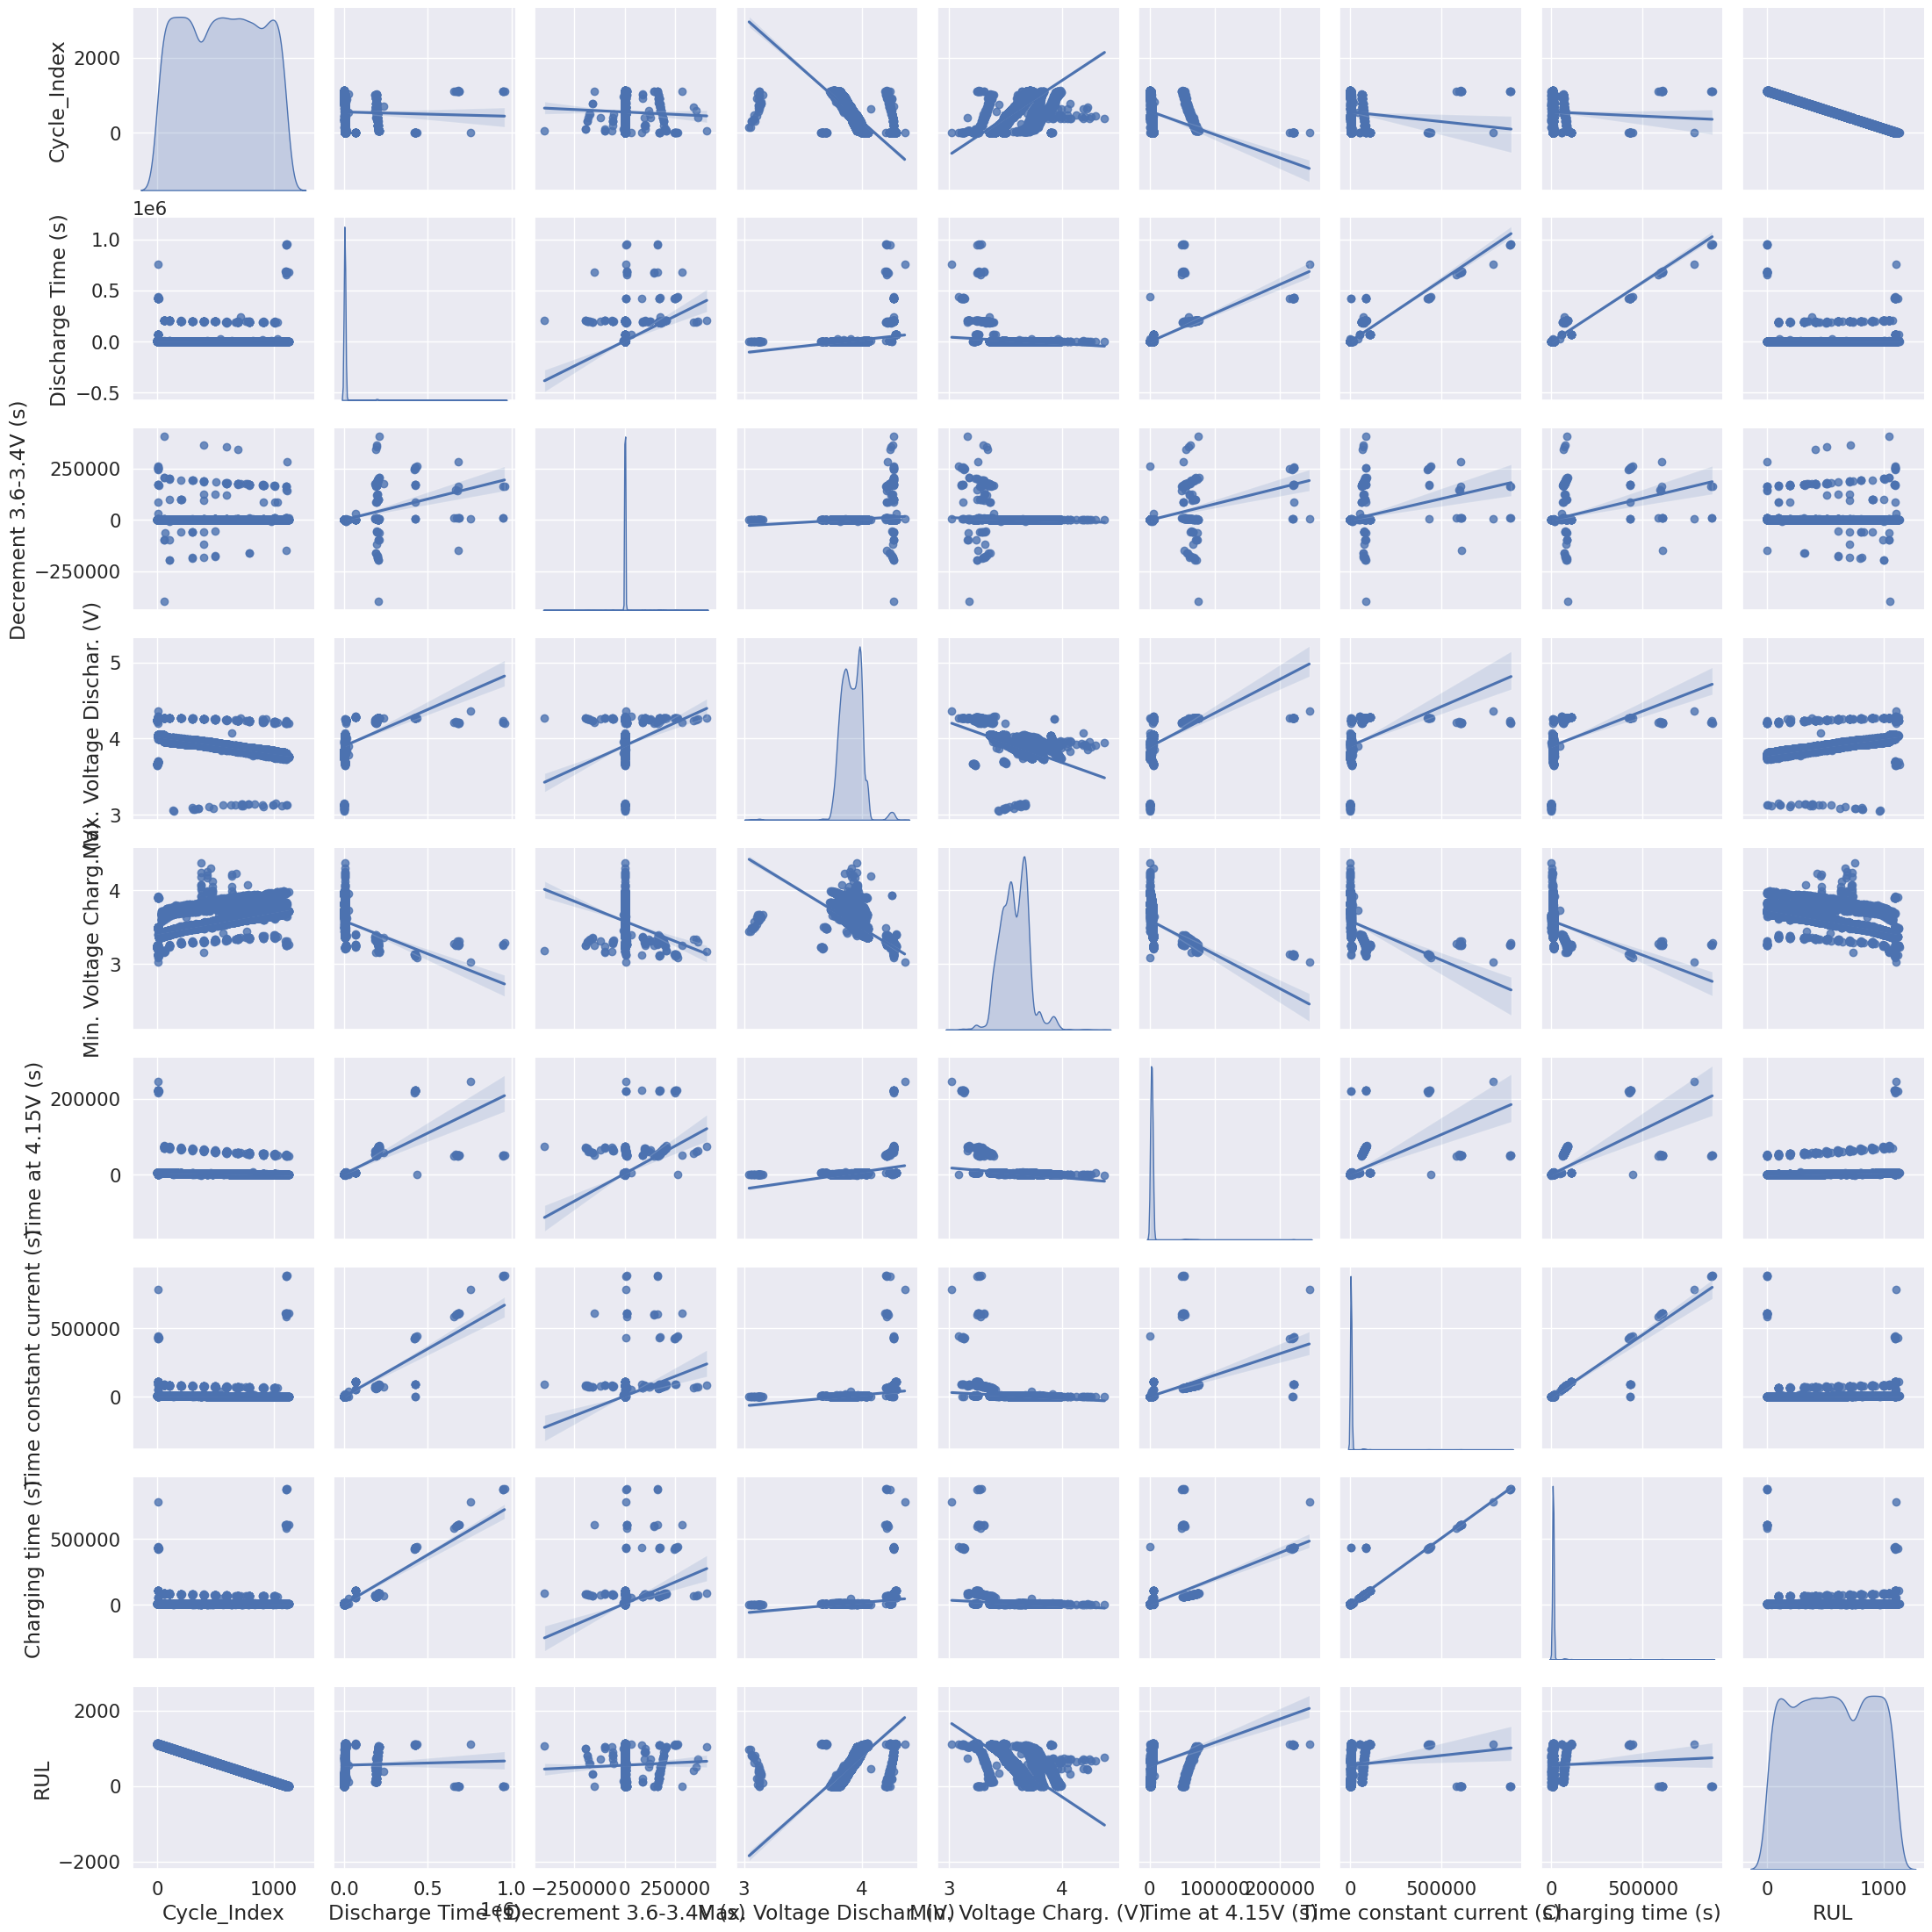

In [13]:
sns.pairplot(df[['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
                 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)',
                 'Time constant current (s)', 'Charging time (s)', 'RUL']],
             diag_kind='kde', kind='reg')
plt.show()

We need to remove Cycle_Index It's the reverse side of the coin with RUL.

In [14]:
target = df['RUL']
features = df.drop(['RUL'], axis=1)
target.shape, features.shape

((15064,), (15064, 8))

In [15]:
features = features.drop(['Cycle_Index'], axis=1)     # drop Cycle_Index
features.shape

(15064, 7)

#standardization of features

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
features_std = pd.DataFrame(features_std, columns = features.columns)
features_std

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,-0.059922,-0.005871,-2.617313,-2.966302,0.185302,0.051431,0.026929
1,0.085308,-0.004473,3.712333,-2.893540,0.190668,0.051710,0.016425
2,0.084859,-0.008431,3.745300,-2.861201,0.190668,0.051710,0.013397
3,0.084610,-0.010603,3.756289,-2.853117,0.189904,0.051710,0.009704
4,1.823662,1.899962,4.195847,-1.454466,0.187601,1.898321,1.765439
...,...,...,...,...,...,...,...
15059,-0.114982,-0.070500,-1.485449,1.326665,-0.311697,-0.160957,-0.128248
15060,-0.114961,-0.070500,-1.485449,1.342834,-0.312493,-0.160960,-0.128570
15061,-0.115022,-0.070511,-1.485449,1.326665,-0.312493,-0.160960,-0.129829
15062,-0.114878,-0.071641,-1.595339,2.110879,-0.353694,-0.171468,-0.091082


#The dataset is divided into training and testing data for model

In [17]:
from sklearn.model_selection import (train_test_split, StratifiedKFold)
X_train, X_test, y_train, y_test = train_test_split(features_std, target, test_size=0.2, random_state=2301)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12051, 7), (3013, 7), (12051,), (3013,))

In [19]:
pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])
pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [20]:
Pipeline(steps=[('impute', SimpleImputer())])

Pipeline(steps=[('impute', SimpleImputer())])

In [21]:
def prepare_model(algorithm, X_train, y_train):
    model = Pipeline(steps=[('preprocessing', pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [22]:
algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(),
              LinearRegression(), SGDRegressor(), KNeighborsRegressor()]

In [23]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

print('Regression Results in Algorithms')
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

# RandomForestRegressor is confirmed as the best model

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
3,BaggingRegressor,510.421379,22.592507,0.698383
0,RandomForestRegressor,576.620378,24.012921,8.065747
6,ExtraTreeRegressor,926.728510,30.442216,0.031412
9,KNeighborsRegressor,984.294245,31.373464,0.101249
5,DecisionTreeRegressor,1274.467391,35.699683,0.104465
2,GradientBoostingRegressor,1949.202873,44.149778,2.558526
1,AdaBoostRegressor,4474.926202,66.894889,1.037143
4,SVR,10637.882904,103.140113,11.044090
8,SGDRegressor,22010.251891,148.358525,0.056769
7,LinearRegression,22060.500669,148.527777,0.037774


The RandomForest Regressor showed the most promising performance among the many machine learning algorithms investigated, giving the ideal outcomes.

#RandomForestRegressor

In [24]:
rfr = RandomForestRegressor(random_state=2301, n_estimators=100)

rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

rfr_pred = rfr.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print(rfr_rmse)

0.9992551591168894
0.9946374861674492
23.265781917602382


<Axes: ylabel='RUL'>

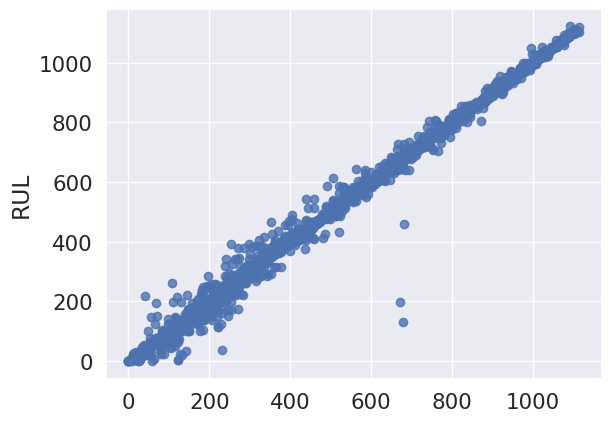

In [25]:
sns.regplot(x = rfr_pred, y = y_test)

#feature importance¶

In [26]:
rfr.feature_importances_

array([0.8662972 , 0.08660112, 0.0165921 , 0.00620553, 0.0075073 ,
       0.01144001, 0.00535674])

Text(0.5, 0, 'Random Forest Feature Importance')

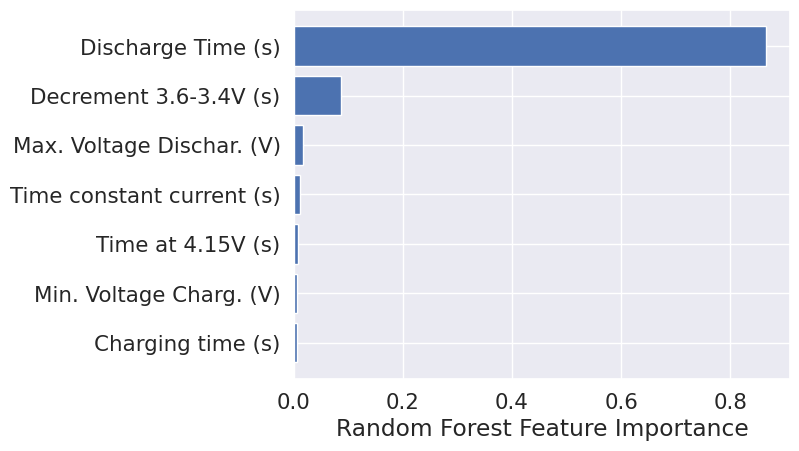

In [27]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#BaggingRegressor

In [28]:
br = BaggingRegressor(random_state=2301)

br.fit(X_train, y_train)
print(br.score(X_train, y_train))
print(br.score(X_test, y_test))

br_pred = br.predict(X_test)
br_rmse = np.sqrt(mean_squared_error(y_test, br_pred))
print(br_rmse)

0.9988627924570438
0.9942664055284801
24.057302357071208


#KNeighborsRegressor

In [29]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

knr_pred = knr.predict(X_test)
knr_rmse = np.sqrt(mean_squared_error(y_test, knr_pred))
print(knr_rmse)

0.9967541108388609
0.9908772108099609
30.34570697198543


#xtraTreeRegressor

In [30]:
etr = ExtraTreeRegressor(random_state=2301)

etr.fit(X_train, y_train)
etr.fit(X_train, y_train)
print(etr.score(X_train, y_train))
print(etr.score(X_test, y_test))

etr_pred = etr.predict(X_test)
etr_rmse = np.sqrt(mean_squared_error(y_test, etr_pred))
print(etr_rmse)

0.9999999068777385
0.9905945507177002
30.812235824993532


#DecisionTreeRegressor

In [31]:
dtr = DecisionTreeRegressor(random_state=2301)
dtr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

dtr_pred = dtr.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
print(dtr_rmse)

0.9999999068777385
0.9885531782770145
33.99193594457182


#Sum of models

In [32]:
preds = 0.2*rfr_pred + 0.2*br_pred + 0.2*knr_pred + 0.2*etr_pred + 0.2*dtr_pred
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

21.881182514754

<Axes: ylabel='RUL'>

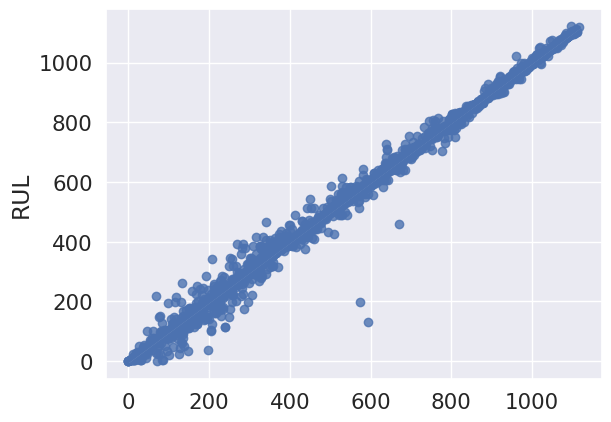

In [33]:
preds
sns.regplot(x = preds, y = y_test)